# Predicting Heart Failure using Machine Learning Algorithms and IBM Auto AI Service

# Problem Statement: The problem statement is to build machine learning models for heart failure prediction using different classifiers and to compare these classifiers to find the best one in terms of accuracy and reliability so that we can reduce the deaths due to heart failure.

# Data Preprocessing

importing necessary libraries

In [15]:
import pandas as pd #used for data manipulation
import numpy as np #used for numerical analysis
from collections import Counter as c #return counts
import seaborn as sns # used for data visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #splits data in random train and test array
import pickle #python object hierarchy is converted into a byte stream
from sklearn.linear_model import LinearRegression #Regression ML algorithm

In [16]:
data=pd.read_csv("C:\\Users\\joyal\\OneDrive\\Desktop\\Predict Heart Failure\\patientdataV6.csv")#loading the csv data

In [17]:
data.shape

(10800, 10)

In [18]:
#Data Analysis
data.columns#returns all the column names

Index(['AVGHEARTBEATSPERMIN', 'PALPITATIONSPERDAY', 'CHOLESTEROL', 'BMI',
       'HEARTFAILURE', 'AGE', 'SEX', 'FAMILYHISTORY', 'SMOKERLAST5YRS',
       'EXERCISEMINPERWEEK'],
      dtype='object')

In [19]:
data.columns=['Avg_heartbeats_per_min','Palpitations_per_day','Cholestrol','BMI','Heart_failure','Age','Sex','Family_history','Smoker_last_5years','Exercise_mins_per_week']#manually giving the names of the columns

In [20]:
data.columns#returns all the column names

Index(['Avg_heartbeats_per_min', 'Palpitations_per_day', 'Cholestrol', 'BMI',
       'Heart_failure', 'Age', 'Sex', 'Family_history', 'Smoker_last_5years',
       'Exercise_mins_per_week'],
      dtype='object')

In [21]:
data.head()#returns the first 5 row values

,Avg_heartbeats_per_min,Palpitations_per_day,Cholestrol,BMI,Heart_failure,Age,Sex,Family_history,Smoker_last_5years,Exercise_mins_per_week
0,93,22,163,25,N,49,F,N,N,110
1,108,22,181,24,N,32,F,N,N,192
2,86,0,239,20,N,60,F,N,N,121
3,80,36,164,31,Y,45,F,Y,N,141
4,66,36,185,23,N,39,F,N,N,63


Understanding the Data Type and Summary of features

In [22]:
data.info() #to get the summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Avg_heartbeats_per_min  10800 non-null  int64 
 1   Palpitations_per_day    10800 non-null  int64 
 2   Cholestrol              10800 non-null  int64 
 3   BMI                     10800 non-null  int64 
 4   Heart_failure           10800 non-null  object
 5   Age                     10800 non-null  int64 
 6   Sex                     10800 non-null  object
 7   Family_history          10800 non-null  object
 8   Smoker_last_5years      10800 non-null  object
 9   Exercise_mins_per_week  10800 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 843.9+ KB


In [23]:
data.describe()#returns important values for continuous column data

,Avg_heartbeats_per_min,Palpitations_per_day,Cholestrol,BMI,Age,Exercise_mins_per_week
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,87.115093,20.423148,195.080278,26.359722,49.965185,119.729537
std,19.744375,12.165320,26.136732,3.820147,13.079281,71.147060
min,48.000000,0.000000,150.000000,20.000000,28.000000,0.000000
25%,72.000000,10.000000,173.000000,23.000000,39.000000,58.000000
50%,85.000000,20.000000,196.000000,26.000000,50.000000,119.000000
75%,100.000000,31.000000,217.000000,30.000000,61.000000,180.000000
max,161.000000,45.000000,245.000000,34.000000,72.000000,250.000000


Observing Target, Numerical and Categorical columns

In [24]:
np.unique(data.dtypes,return_counts=True)#data.dtypes will return us all the different types of data present in our data and return_countswill givw us the count

(array([dtype('int64'), dtype('O')], dtype=object), array([6, 4], dtype=int64))

In [25]:
cat=data.dtypes[data.dtypes=='O'].index.values#for fetching all the object or categorical type of columns from our data and we are sorting it as set in variable catcols
cat

array(['Heart_failure', 'Sex', 'Family_history', 'Smoker_last_5years'],
      dtype=object)

In [26]:
for i in cat:
    print("Column:",i)
    print('count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120) #We are looping with each categorical column and printing the classes of each categorical column using the counter function so that we can detect which columns are categorical and which are not

Column: Heart_failure
count of classes :  2
Counter({'N': 9012, 'Y': 1788})
************************************************************************************************************************
Column: Sex
count of classes :  2
Counter({'M': 5454, 'F': 5346})
************************************************************************************************************************
Column: Family_history
count of classes :  2
Counter({'N': 8811, 'Y': 1989})
************************************************************************************************************************
Column: Smoker_last_5years
count of classes :  2
Counter({'N': 10378, 'Y': 422})
************************************************************************************************************************


In [27]:
data.dtypes[data.dtypes!='O'].index.values#finding the numerical columns

array(['Avg_heartbeats_per_min', 'Palpitations_per_day', 'Cholestrol',
       'BMI', 'Age', 'Exercise_mins_per_week'], dtype=object)

In [28]:
#Handling null values
data.isnull().sum()#used for finding null values

Avg_heartbeats_per_min    0
Palpitations_per_day      0
Cholestrol                0
BMI                       0
Heart_failure             0
Age                       0
Sex                       0
Family_history            0
Smoker_last_5years        0
Exercise_mins_per_week    0
dtype: int64

There is no null values in the dataset

In [29]:
#Label Encoding

In [30]:
#Handling categorical data
#Labeling the categorical columns
from sklearn.preprocessing import LabelEncoder#Importig the LabelEncoding from sklearn
x='*'
for i in cat:
    print("LABEL ENCODING OF: ",i)
    LE = LabelEncoder()
    print(c(data[i]))
    data[i]=LE.fit_transform(data[i])
    print(c(data[i]))
    print(x*100)

LABEL ENCODING OF:  Heart_failure
Counter({'N': 9012, 'Y': 1788})
Counter({0: 9012, 1: 1788})
****************************************************************************************************
LABEL ENCODING OF:  Sex
Counter({'M': 5454, 'F': 5346})
Counter({1: 5454, 0: 5346})
****************************************************************************************************
LABEL ENCODING OF:  Family_history
Counter({'N': 8811, 'Y': 1989})
Counter({0: 8811, 1: 1989})
****************************************************************************************************
LABEL ENCODING OF:  Smoker_last_5years
Counter({'N': 10378, 'Y': 422})
Counter({0: 10378, 1: 422})
****************************************************************************************************


In [31]:
data.head()

,Avg_heartbeats_per_min,Palpitations_per_day,Cholestrol,BMI,Heart_failure,Age,Sex,Family_history,Smoker_last_5years,Exercise_mins_per_week
0,93,22,163,25,0,49,0,0,0,110
1,108,22,181,24,0,32,0,0,0,192
2,86,0,239,20,0,60,0,0,0,121
3,80,36,164,31,1,45,0,1,0,141
4,66,36,185,23,0,39,0,0,0,63


# Data Visualization

In [32]:
#grouping the SEX and HEARTFAILURE columns 

In [33]:
data['Heart_failure'].value_counts()

0    9012
1    1788
Name: Heart_failure, dtype: int64

C:\Users\joyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heart_failure', ylabel='count'>

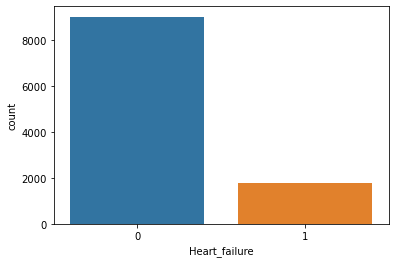

In [28]:
sns.countplot(data['Heart_failure'])

<AxesSubplot:xlabel='Age', ylabel='count'>

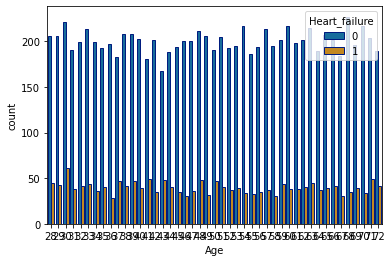

In [29]:
sns.countplot(x='Age', hue='Heart_failure', data=data, palette='colorblind', edgecolor=sns.color_palette('dark',n_colors=1))

The above graph shows the age versus the number of people who have heart failure and those who dont have heart failure. The graph is symmetric, i.e, In all ages there are a fixed number of people who have heart failure

<AxesSubplot:xlabel='BMI', ylabel='Heart_failure'>

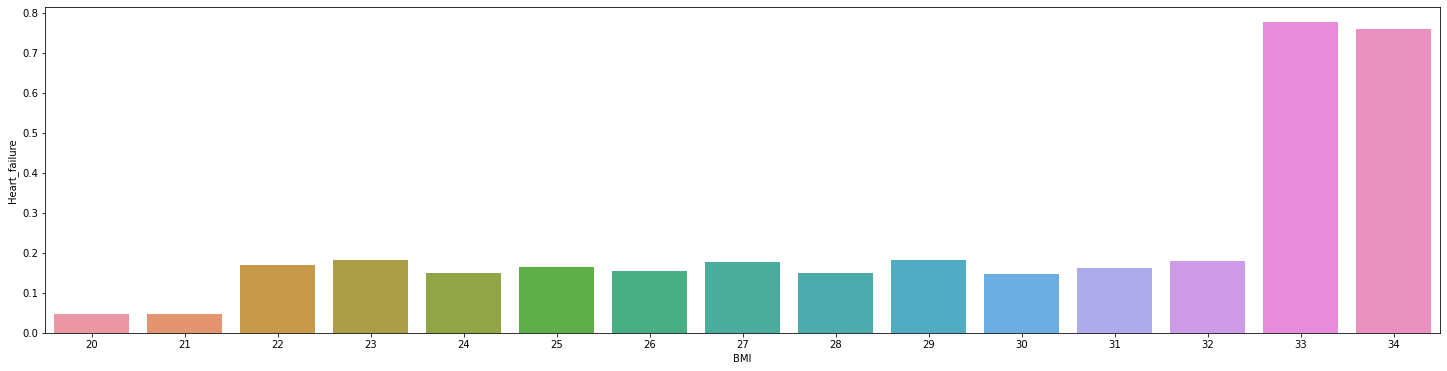

In [34]:
HF1=data.groupby(['BMI'])['Heart_failure'].mean().sort_values()[:15].reset_index()
plt.figure(figsize=(25,6))
sns.barplot(x = "BMI",y="Heart_failure",data=HF1)

<AxesSubplot:xlabel='Palpitations_per_day', ylabel='Heart_failure'>

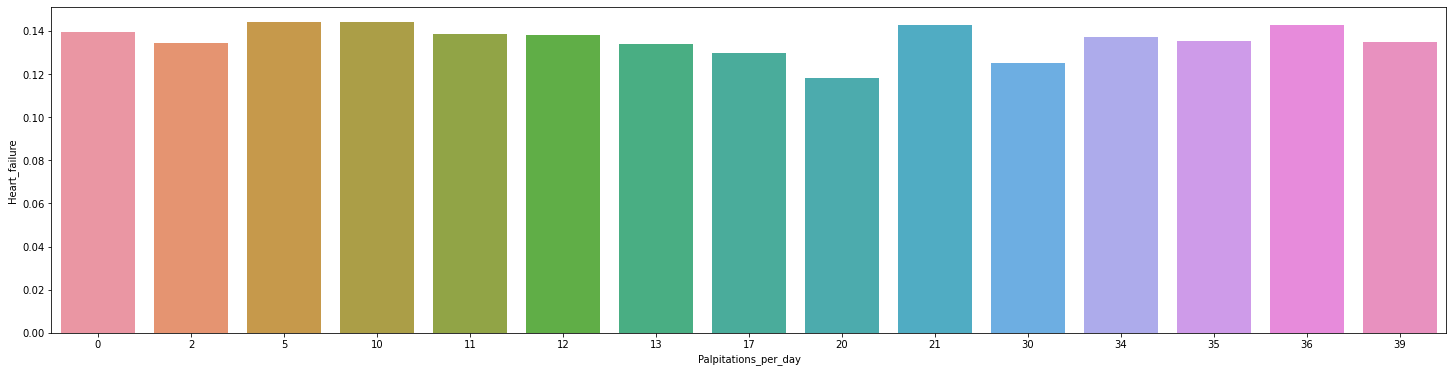

In [35]:
HF2=data.groupby(['Palpitations_per_day'])['Heart_failure'].mean().sort_values()[:15].reset_index()
plt.figure(figsize=(25,6))
sns.barplot(x = "Palpitations_per_day",y="Heart_failure",data=HF2)

<AxesSubplot:xlabel='Age', ylabel='Heart_failure'>

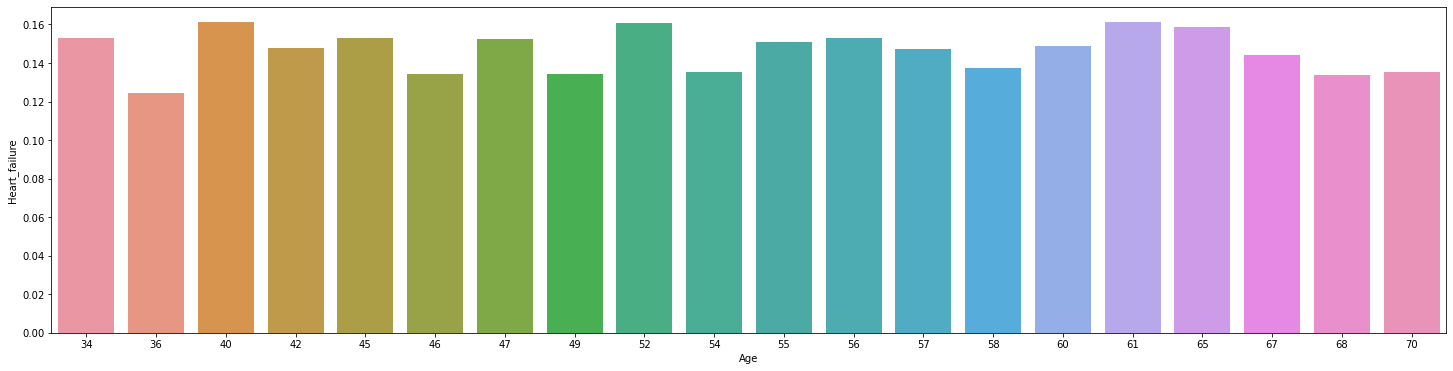

In [36]:
HF3=data.groupby(['Age'])['Heart_failure'].mean().sort_values()[:20].reset_index()
plt.figure(figsize=(25,6))
sns.barplot(x = "Age",y="Heart_failure",data=HF3)

<AxesSubplot:xlabel='Exercise_mins_per_week', ylabel='Heart_failure'>

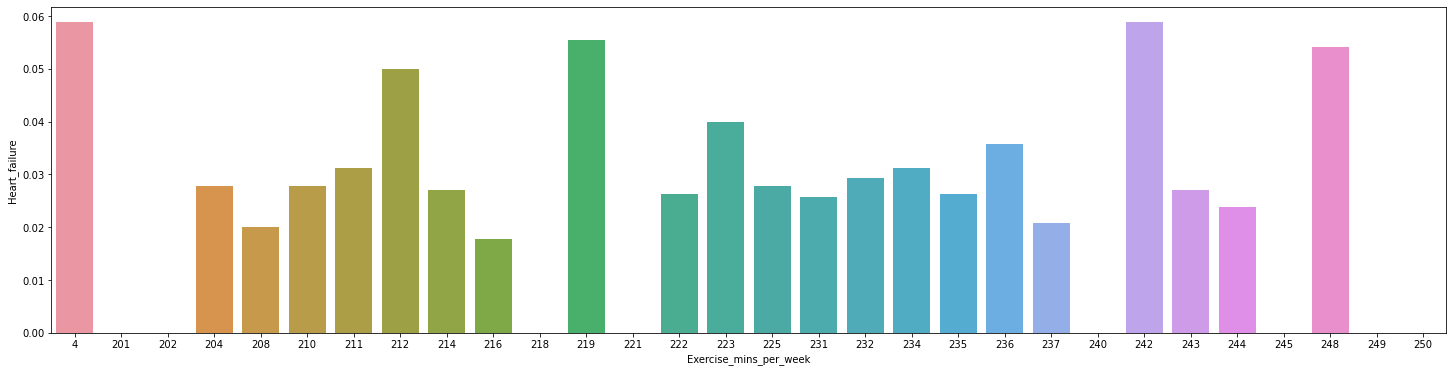

In [37]:
HF4=data.groupby(['Exercise_mins_per_week'])['Heart_failure'].mean().sort_values()[:30].reset_index()
plt.figure(figsize=(25,6))
sns.barplot(x = "Exercise_mins_per_week",y="Heart_failure",data=HF4)

<AxesSubplot:xlabel='Avg_heartbeats_per_min', ylabel='Heart_failure'>

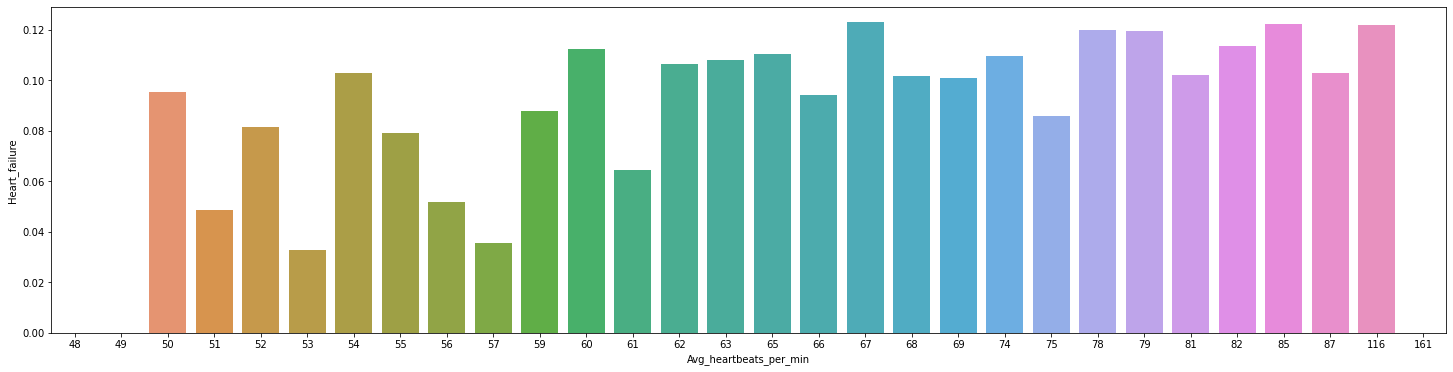

In [38]:
HF5=data.groupby(['Avg_heartbeats_per_min'])['Heart_failure'].mean().sort_values()[:30].reset_index()
plt.figure(figsize=(25,6))
sns.barplot(x = "Avg_heartbeats_per_min",y="Heart_failure",data=HF5)

In [39]:
##Applying Correlation

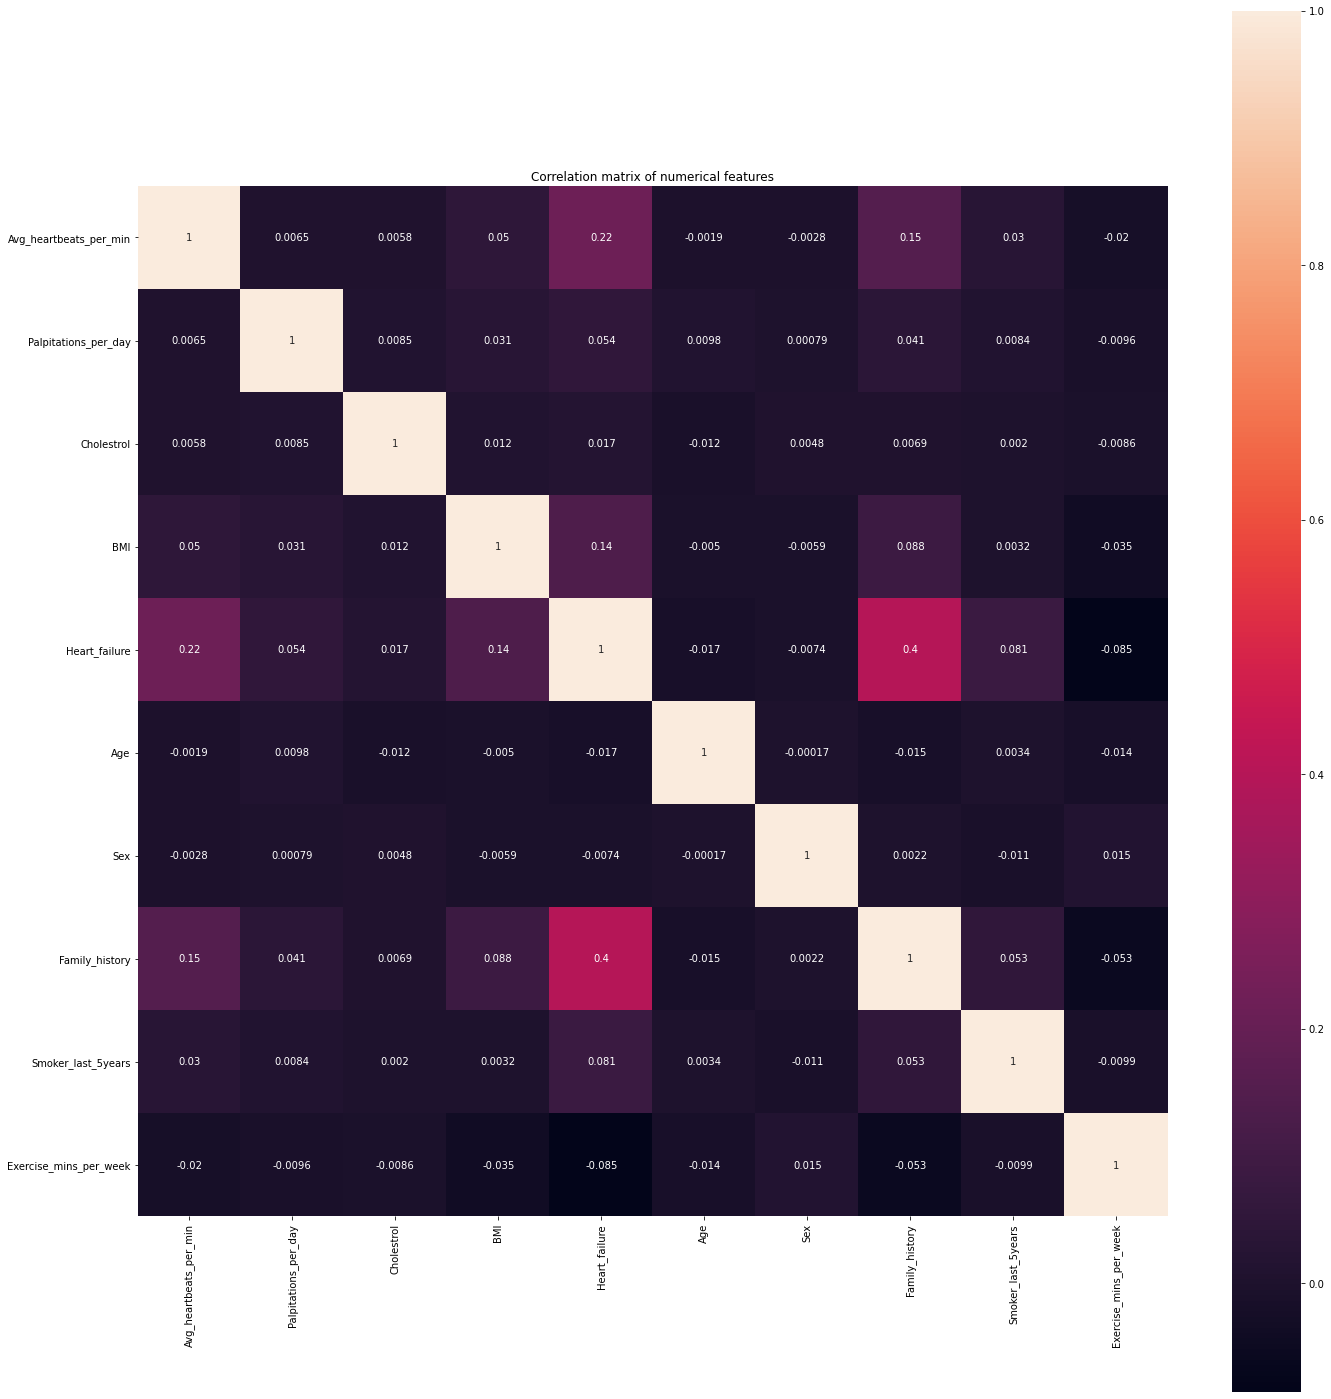

In [40]:
#get correlation of each features in a dataset
corr = data.corr()#perform correlation between all continuous features
plt.subplots(figsize=(20,20));
sns.heatmap(corr, annot=True, square=True)#plotting heatmap of correlations
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

    Feature selection

Correlation using heatmap

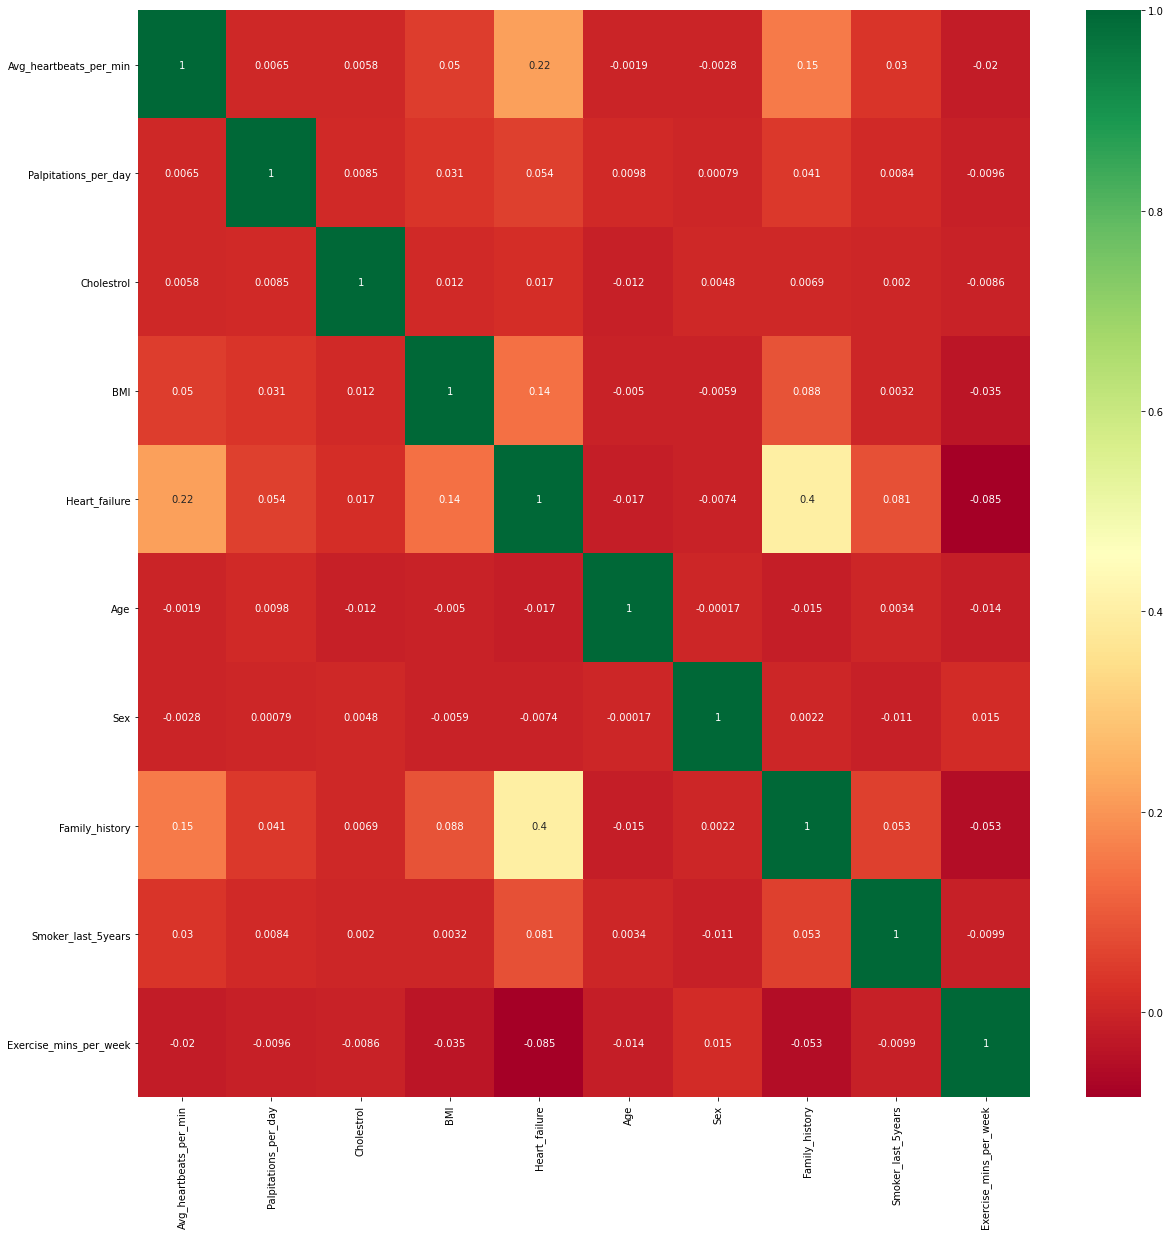

In [41]:
corr = data.corr()#perform correlation between all continuous features
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corr, annot=True,cmap="RdYlGn")

Most of the variables have positive correlation with each other

<AxesSubplot:>

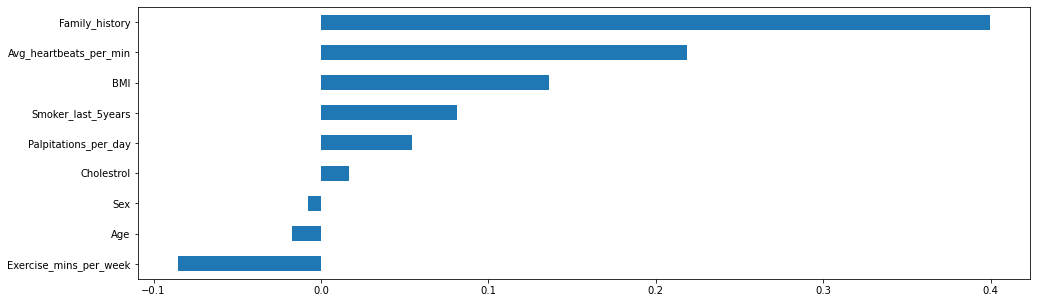

In [42]:
#Correlation with target column
plt.figure(figsize=(16,5))
corr["Heart_failure"].sort_values(ascending=True)[:-1].plot(kind="barh")

The above graph shows that variables like Age, sex and Excercise_mins_per_week have a negative correlation with the target variable "Heart_failure

Creating the dependent and independent variable

In [44]:
x = data.drop(['Heart_failure'],axis=1)#independent feature

In [45]:
x=pd.DataFrame(x)

In [46]:
x

,Avg_heartbeats_per_min,Palpitations_per_day,Cholestrol,BMI,Age,Sex,Family_history,Smoker_last_5years,Exercise_mins_per_week
0,93,22,163,25,49,0,0,0,110
1,108,22,181,24,32,0,0,0,192
2,86,0,239,20,60,0,0,0,121
3,80,36,164,31,45,0,1,0,141
4,66,36,185,23,39,0,0,0,63
...,...,...,...,...,...,...,...,...,...
10795,122,27,203,30,31,0,0,0,246
10796,67,15,186,25,54,0,0,0,189
10797,103,6,211,20,40,0,0,0,205
10798,99,30,152,27,32,1,0,0,211


In [47]:
y = data['Heart_failure']#dependent feature
y=pd.DataFrame(y)

In [48]:
y

,Heart_failure
0,0
1,0
2,0
3,1
4,0
...,...
10795,0
10796,0
10797,0
10798,0


In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.29806868,  0.12962461, -1.22745886, ..., -0.47512162,
        -0.20165054, -0.13675881],
       [ 1.05781389,  0.12962461, -0.53874102, ..., -0.47512162,
        -0.20165054,  1.0158369 ],
       [-0.05647908, -1.67887841,  1.68046089, ..., -0.47512162,
        -0.20165054,  0.01785768],
       ...,
       [ 0.80456549, -1.18565032,  0.60912203, ..., -0.47512162,
        -0.20165054,  1.19856549],
       [ 0.60196677,  0.78726207, -1.64834198, ..., -0.47512162,
        -0.20165054,  1.28290176],
       [-1.87986759,  0.86946675,  1.41262618, ..., -0.47512162,
        -0.20165054, -0.92389735]])

In [50]:
#Splitting the dataset into train and test

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8640, 9)
(2160, 9)
(8640, 1)
(2160, 1)


# Building the ML model

1). Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)

C:\Users\joyal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [53]:
y_test[:30]

,Heart_failure
8328,1
1238,0
5124,1
4290,0
6022,0
4672,0
6067,0
3810,1
3634,0
8243,0


In [54]:
y_pred=logr.predict(x_test)
y_pred[:30]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#accuracy_score(y_pred,y_test)
confusion_matrix(y_pred,y_test)

array([[1765,  226],
       [  48,  121]], dtype=int64)

accuracy score we will use only if the classes are balanced in nature

In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1991
           1       0.35      0.72      0.47       169

    accuracy                           0.87      2160
   macro avg       0.66      0.80      0.70      2160
weighted avg       0.92      0.87      0.89      2160



In [57]:
# Use score method to get accuracy of model
score = logr.score(x_test, y_test)
print(score)

0.8731481481481481


The logistic regression model gives an accuracy of 87.31%

2). Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

<ipython-input-61-3872a98b0b86>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier()

In [62]:
y_test

,Heart_failure
8328,1
1238,0
5124,1
4290,0
6022,0
...,...
5365,0
8293,0
10325,0
1424,0


In [63]:
y_pred=rfc.predict(x_test)
y_pred[:30]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0])

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.8856481481481482

In [ ]:
#Random Forest algorithm gives an accuracy of 88.56%

In [65]:
confusion_matrix(y_test,y_pred)

array([[1758,   55],
       [ 192,  155]], dtype=int64)

In [66]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1950
           1       0.45      0.74      0.56       210

    accuracy                           0.89      2160
   macro avg       0.71      0.82      0.75      2160
weighted avg       0.92      0.89      0.90      2160



In [67]:
# Use score method to get accuracy of model
score = rfc.score(x_test, y_test)
print(score)

0.8856481481481482


3). Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
y_test

,Heart_failure
8328,1
1238,0
5124,1
4290,0
6022,0
...,...
5365,0
8293,0
10325,0
1424,0


In [73]:
y_pred=dtc.predict(x_test)
y_pred[:30]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0])

In [74]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.8013888888888889

In [ ]:
#Decision Tree Algorithm gives an accuracy of 80.13%

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1813
           1       0.40      0.48      0.43       347

    accuracy                           0.80      2160
   macro avg       0.65      0.67      0.66      2160
weighted avg       0.82      0.80      0.81      2160



In [76]:
confusion_matrix(y_test,y_pred)

array([[1566,  247],
       [ 182,  165]], dtype=int64)

KNN Classifier

In [78]:
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
#pipe=([('sd',StandardScaler()),
 #      ('knn',KNeighborsClassifier())])
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

<ipython-input-78-6a02ea5720e4>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


KNeighborsClassifier()

In [79]:
y_test

,Heart_failure
8328,1
1238,0
5124,1
4290,0
6022,0
...,...
5365,0
8293,0
10325,0
1424,0


In [80]:
y_pred=knn.predict(x_test)
y_pred[:30]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8546296296296296

In [82]:
y_train_pred=knn.predict(x_train)
y_train_pred[:30]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
accuracy_score(y_train,y_train_pred)

0.8759259259259259

KNN algorithm gives an accuracy of 87.59%

In [74]:
from collections import Counter as c
c(y_test)

Counter({'Heart_failure': 1})

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1732   81]
 [ 233  114]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1813
           1       0.58      0.33      0.42       347

    accuracy                           0.85      2160
   macro avg       0.73      0.64      0.67      2160
weighted avg       0.83      0.85      0.84      2160



Naive Bayes Classifier

In [86]:
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

nb.fit(x_train,y_train)

C:\Users\joyal\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [87]:
y_test

,Heart_failure
8328,1
1238,0
5124,1
4290,0
6022,0
...,...
5365,0
8293,0
10325,0
1424,0


In [88]:
y_pred=nb.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8324074074074074

In [90]:
y_train_pred=nb.predict(x_train)
y_train_pred

array([0, 0, 1, ..., 1, 0, 0])

In [91]:
accuracy_score(y_train,y_train_pred)

0.8199074074074074

In [92]:
from collections import Counter as c
c(y_test)

Counter({'Heart_failure': 1})

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1602  211]
 [ 151  196]]


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1813
           1       0.48      0.56      0.52       347

    accuracy                           0.83      2160
   macro avg       0.70      0.72      0.71      2160
weighted avg       0.84      0.83      0.84      2160

